# piechartlistvar

Pie chart of frequency of a variable which contains a list. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import ds9
df = ds9.df()

In [2]:
df = ds9.keepcolumns(df, 'relationshipspaxslash')
df = ds9.explode(df, 'relationshipspaxslash')
# Drop non-cast
index = df[df['relationshipspaxslash'] == 'non-cast'].index
df = df.drop(index)

relationshipspaxslash_type = ds9.strtotype(df, 'relationshipspaxslash')
df['relationshipspaxslash'] = df['relationshipspaxslash'].astype(relationshipspaxslash_type)
freq_df = df['relationshipspaxslash'].value_counts().rename_axis('relationshipspaxslash').to_frame('frequency')

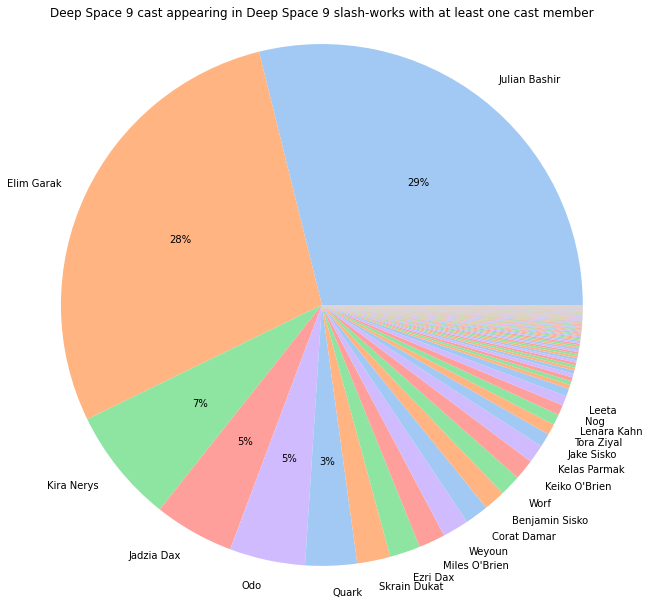

In [3]:
def bigpercent(d):
    if d >= 3.0:
        d = round(d)
        return '{}%'.format(d)
    else:
        return ''

labels = freq_df.index.values.tolist()
for i, x in enumerate(labels):
    if i > 19:
        labels[i] = ''

colors = sns.color_palette('pastel')[0:5]

plt.pie(freq_df['frequency'], colors = colors, labels=labels, radius=3, autopct=bigpercent)
plt.title('Deep Space 9 cast appearing in Deep Space 9 slash-works with at least one cast member', y=1.8)
plt.savefig('piechartlistvar-relationshipspaxslash.svg', bbox_inches='tight')
plt.show()